Supervised Assignment 5

Basma Mahmoud Hashem, 20210091

Selsabeel Asim Ali Elbagir, 20210714

Abdelrahman Mohamed Ali, 20210518

## Import Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt


In [2]:
# Set seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

dataset = keras.datasets.fashion_mnist

(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Data Preprocessing

Data Scaling

In [3]:
#Normalize data to make it from 0 to 1
X_train = X_train/255.0
X_test = X_test/255.0


#Standardizee data to be distributed as a bell curve with mean = 0 and standard deviation = 1
mean_pixel = np.mean(X_train)
std_pixel = np.std(X_train)
# X_train_standardized = (X_train - mean_pixel) / std_pixel
# X_test_standardized = (X_test - mean_pixel) / std_pixel

Data augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)
batch_size = 32
augmented_data_generator = datagen.flow(X_train, Y_train, batch_size=batch_size)


In [5]:
# print(X_train.shape)   ----> (60000, 28, 28, 1)
# print(X_test.shape)    ----> (10000, 28, 28, 1)

# Remove the last dimension with size 1
X_train = np.squeeze(X_train)
X_test = np.squeeze(X_test)

# print(X_train.shape)   ----> (60000, 28, 28)
# print(X_test.shape)    ----> (10000, 28, 28)

In [6]:
input_shape = (28,28)

## Models

In [10]:
# layer_sizes:          512, 256, 64
# activation_functions: relu
# regularizer_rate :    0.0
# dropout_rate:         0.3

model3 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=512, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=256, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.3),
    Dense(units=10, activation='softmax')
])


In [11]:
# layer_sizes:          512, 256, 64
# activation_functions: tanh
# regularizer_rate :    0.0
# dropout_rate:         0.3

model4 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=512, activation='tanh'),
    Dropout(rate=0.3),
    Dense(units=256, activation='tanh'),
    Dropout(rate=0.3),
    Dense(units=64, activation='tanh'),
    Dropout(rate=0.3),
    Dense(units=10, activation='softmax')
])

In [12]:
# layer_sizes:          256, 128, 64
# activation_functions: sigmoid
# regularizer_rate :    0.0
# dropout_rate:         0.2 and 0.3

model5 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=256, activation='sigmoid'),
    Dropout(rate=0.2),
    Dense(units=128, activation='sigmoid'),
    Dropout(rate=0.3),
    Dense(units=64, activation='sigmoid'),
    Dropout(rate=0.2),
    Dense(units=10, activation='softmax')
])


In [13]:
# layer_sizes:          128, 64
# activation_functions: relu
# regularizer_rate :    0.0
# dropout_rate:         0.0

model6 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.0),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.0),
    Dense(units=10, activation='softmax')
])


In [14]:
# layer_sizes:          256, 128, 64
# activation_functions: sigmoid
# regularizer_rate :    0.0
# dropout_rate:         0.0

model7 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(units=256, activation='sigmoid'),
    Dense(units=128, activation='sigmoid'),
    Dense(units=64, activation='sigmoid'),
    Dense(units=10, activation='softmax')
])

In [15]:
# layer_sizes:          64, 64, 128
# activation_functions: relu
# regularizer_rate :    0.0
# dropout_rate:         0.0

model8 = Sequential([
    Conv2D(64, (3, 3), activation='relu',
    input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [32]:

model3.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model7.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model8.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

### Good Models

In [30]:
# Model 3`s Test accuracy: 0.8888   SGD   + [512, 256, 64]              + ReLU    + Dropout=0.3
# Model 4`s Test accuracy: 0.8744   Adam  + [512, 256, 64]              + Tanh    + Dropout=0.3
# Model 5`s Test accuracy: 0.7807   SGD   + [256, 128, 64]              + Sigmoid + Dropout=0.2, 0.3
# Model 6`s Test accuracy: 0.8895   Adam  + [128, 64]                   + ReLU
# Model 7`s Test accuracy: 0.8327   SGD   + [256, 128, 64]              + Sigmoid
# Model 8`s Test accuracy: 0.9024   Adam  + [Conv2D 64, Conv2D 64, 128] + ReLU

In [21]:
model3.fit(X_train, Y_train, epochs=40, batch_size=32 , validation_split= 0.1)

_, test_accuracy3 = model3.evaluate(X_test, Y_test)
print('Model 3`s Test accuracy:', test_accuracy3)

Epoch 1/40
1688/1688 [==============================] - 13s 8ms/step - loss: 0.5610 - accuracy: 0.8027 - val_loss: 0.4467 - val_accuracy: 0.8328
Epoch 2/40
1688/1688 [==============================] - 13s 7ms/step - loss: 0.5069 - accuracy: 0.8217 - val_loss: 0.4113 - val_accuracy: 0.8480
Epoch 3/40
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4771 - accuracy: 0.8311 - val_loss: 0.3929 - val_accuracy: 0.8593
Epoch 4/40
1688/1688 [==============================] - 13s 7ms/step - loss: 0.4492 - accuracy: 0.8425 - val_loss: 0.3909 - val_accuracy: 0.8548
Epoch 5/40
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4349 - accuracy: 0.8475 - val_loss: 0.3670 - val_accuracy: 0.8630
Epoch 6/40
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4182 - accuracy: 0.8524 - val_loss: 0.3744 - val_accuracy: 0.8663
Epoch 7/40
1688/1688 [==============================] - 13s 8ms/step - loss: 0.4059 - accuracy: 0.8571 - val_loss: 0.3540 - val_ac

In [22]:
model4.fit(X_train, Y_train, epochs=40, batch_size=32 , validation_split= 0.1)

_, test_accuracy4 = model4.evaluate(X_test, Y_test)
print('Model 4`s Test accuracy:', test_accuracy4)

Epoch 1/40
1688/1688 [==============================] - 19s 11ms/step - loss: 0.6189 - accuracy: 0.7801 - val_loss: 0.4518 - val_accuracy: 0.8348
Epoch 2/40
1688/1688 [==============================] - 20s 12ms/step - loss: 0.4866 - accuracy: 0.8288 - val_loss: 0.4200 - val_accuracy: 0.8483
Epoch 3/40
1688/1688 [==============================] - 18s 11ms/step - loss: 0.4539 - accuracy: 0.8394 - val_loss: 0.4013 - val_accuracy: 0.8557
Epoch 4/40
1688/1688 [==============================] - 19s 11ms/step - loss: 0.4366 - accuracy: 0.8450 - val_loss: 0.3782 - val_accuracy: 0.8632
Epoch 5/40
1688/1688 [==============================] - 18s 11ms/step - loss: 0.4277 - accuracy: 0.8483 - val_loss: 0.4092 - val_accuracy: 0.8510
Epoch 6/40
1688/1688 [==============================] - 18s 11ms/step - loss: 0.4144 - accuracy: 0.8552 - val_loss: 0.3759 - val_accuracy: 0.8682
Epoch 7/40
1688/1688 [==============================] - 18s 11ms/step - loss: 0.4092 - accuracy: 0.8552 - val_loss: 0.4149 -

In [23]:
model5.fit(X_train, Y_train, epochs=40, batch_size=32 , validation_split= 0.1)

_, test_accuracy5 = model5.evaluate(X_test, Y_test)
print('Model 5`s Test accuracy:', test_accuracy5)

Epoch 1/40
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3314 - accuracy: 0.1066 - val_loss: 2.2741 - val_accuracy: 0.1647
Epoch 2/40
1688/1688 [==============================] - 11s 7ms/step - loss: 2.2773 - accuracy: 0.1386 - val_loss: 2.2042 - val_accuracy: 0.3870
Epoch 3/40
1688/1688 [==============================] - 11s 7ms/step - loss: 2.1016 - accuracy: 0.2257 - val_loss: 1.8297 - val_accuracy: 0.4135
Epoch 4/40
1688/1688 [==============================] - 12s 7ms/step - loss: 1.7045 - accuracy: 0.3286 - val_loss: 1.4677 - val_accuracy: 0.5113
Epoch 5/40
1688/1688 [==============================] - 9s 5ms/step - loss: 1.4496 - accuracy: 0.4106 - val_loss: 1.2694 - val_accuracy: 0.5480
Epoch 6/40
1688/1688 [==============================] - 10s 6ms/step - loss: 1.3028 - accuracy: 0.4740 - val_loss: 1.1554 - val_accuracy: 0.5757
Epoch 7/40
1688/1688 [==============================] - 9s 6ms/step - loss: 1.2128 - accuracy: 0.5134 - val_loss: 1.0810 - val_accu

In [24]:
model6.fit(X_train, Y_train, epochs=40, batch_size=32 , validation_split= 0.1)

_, test_accuracy6 = model6.evaluate(X_test, Y_test)
print('Model 6`s Test accuracy:', test_accuracy6)

Epoch 1/40
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5027 - accuracy: 0.8214 - val_loss: 0.3958 - val_accuracy: 0.8555
Epoch 2/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3696 - accuracy: 0.8654 - val_loss: 0.3588 - val_accuracy: 0.8707
Epoch 3/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3314 - accuracy: 0.8783 - val_loss: 0.3461 - val_accuracy: 0.8757
Epoch 4/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3091 - accuracy: 0.8861 - val_loss: 0.3291 - val_accuracy: 0.8810
Epoch 5/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2925 - accuracy: 0.8925 - val_loss: 0.3218 - val_accuracy: 0.8815
Epoch 6/40
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2778 - accuracy: 0.8957 - val_loss: 0.3453 - val_accuracy: 0.8758
Epoch 7/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2668 - accuracy: 0.8994 - val_loss: 0.3483 - val_accuracy:

In [25]:
model7.fit(X_train, Y_train, epochs=40, batch_size=32 , validation_split= 0.1)

_, test_accuracy7 = model7.evaluate(X_test, Y_test)
print('Model 7`s Test accuracy:', test_accuracy7)

Epoch 1/40
1688/1688 [==============================] - 8s 4ms/step - loss: 2.2831 - accuracy: 0.1754 - val_loss: 2.2536 - val_accuracy: 0.2317
Epoch 2/40
1688/1688 [==============================] - 8s 5ms/step - loss: 2.1640 - accuracy: 0.3430 - val_loss: 1.9911 - val_accuracy: 0.3993
Epoch 3/40
1688/1688 [==============================] - 9s 5ms/step - loss: 1.7458 - accuracy: 0.4342 - val_loss: 1.5594 - val_accuracy: 0.5477
Epoch 4/40
1688/1688 [==============================] - 7s 4ms/step - loss: 1.4129 - accuracy: 0.5380 - val_loss: 1.2741 - val_accuracy: 0.5840
Epoch 5/40
1688/1688 [==============================] - 8s 5ms/step - loss: 1.1905 - accuracy: 0.5880 - val_loss: 1.1102 - val_accuracy: 0.6282
Epoch 6/40
1688/1688 [==============================] - 9s 5ms/step - loss: 1.0662 - accuracy: 0.6159 - val_loss: 1.0121 - val_accuracy: 0.6390
Epoch 7/40
1688/1688 [==============================] - 8s 5ms/step - loss: 0.9820 - accuracy: 0.6398 - val_loss: 0.9339 - val_accuracy:

In [26]:
model8.fit(X_train, Y_train, epochs=40, batch_size=32 , validation_split= 0.1)

_, test_accuracy8 = model8.evaluate(X_test, Y_test)
print('Model 8`s Test accuracy:', test_accuracy8)

Epoch 1/40
1688/1688 [==============================] - 82s 48ms/step - loss: 0.4503 - accuracy: 0.8364 - val_loss: 0.3307 - val_accuracy: 0.8797
Epoch 2/40
1688/1688 [==============================] - 80s 47ms/step - loss: 0.3012 - accuracy: 0.8889 - val_loss: 0.2781 - val_accuracy: 0.8992
Epoch 3/40
1688/1688 [==============================] - 79s 47ms/step - loss: 0.2564 - accuracy: 0.9053 - val_loss: 0.2572 - val_accuracy: 0.9040
Epoch 4/40
1688/1688 [==============================] - 83s 49ms/step - loss: 0.2231 - accuracy: 0.9167 - val_loss: 0.2424 - val_accuracy: 0.9107
Epoch 5/40
1688/1688 [==============================] - 78s 46ms/step - loss: 0.1972 - accuracy: 0.9260 - val_loss: 0.2399 - val_accuracy: 0.9125
Epoch 6/40
1688/1688 [==============================] - 79s 47ms/step - loss: 0.1711 - accuracy: 0.9353 - val_loss: 0.2443 - val_accuracy: 0.9132
Epoch 7/40
1688/1688 [==============================] - 78s 46ms/step - loss: 0.1531 - accuracy: 0.9422 - val_loss: 0.2568 -

In [27]:

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


def plot(test_data, test_labels, predict_labels):
    '''
    Takes test data, their corresponding actual labels, and their predicted labels.
    It shows randomly three samples of the test data and its actual and predicted label.
    '''
    num_images = test_data.shape[0]
    random_indices = np.random.choice(num_images, 3, replace=False) # random positions

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    for i, idx in enumerate(random_indices):
        image = test_data[idx]
        actual_label = class_names[test_labels[idx]]
        predicted_label = class_names[predict_labels[idx]]

        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

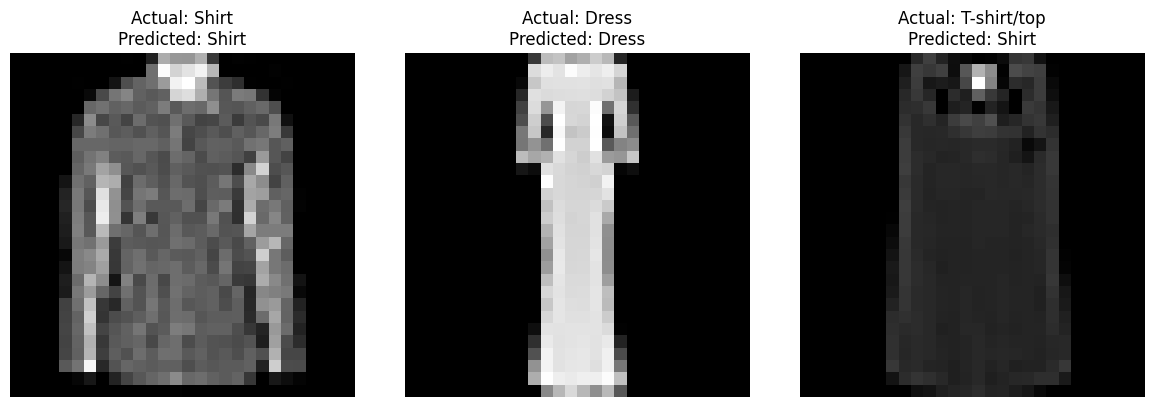

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

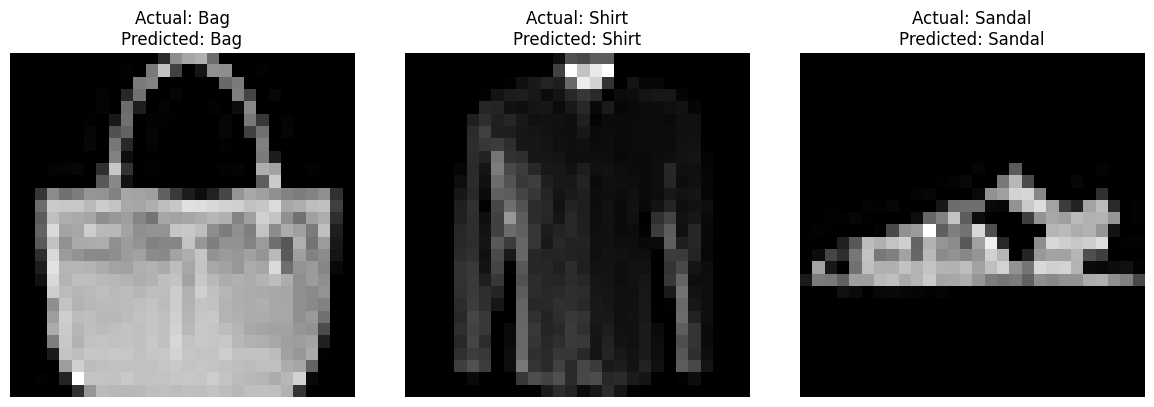

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)               

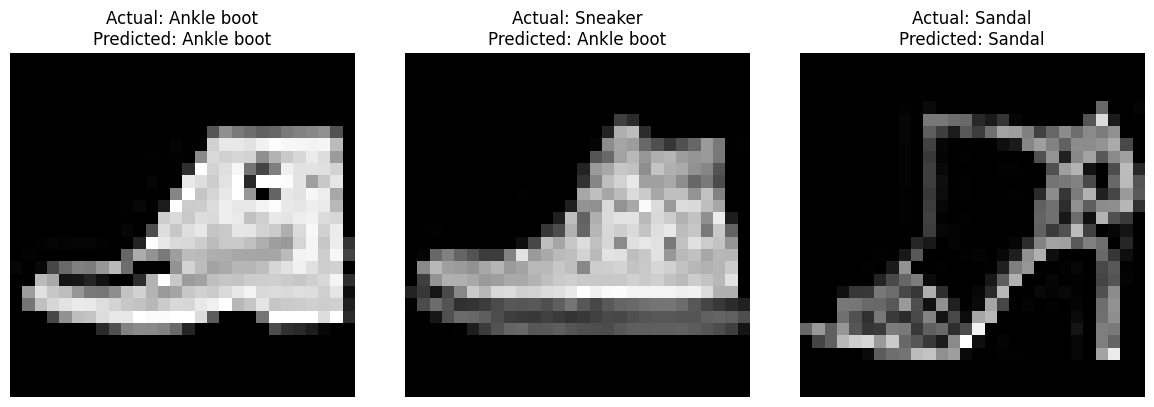

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109

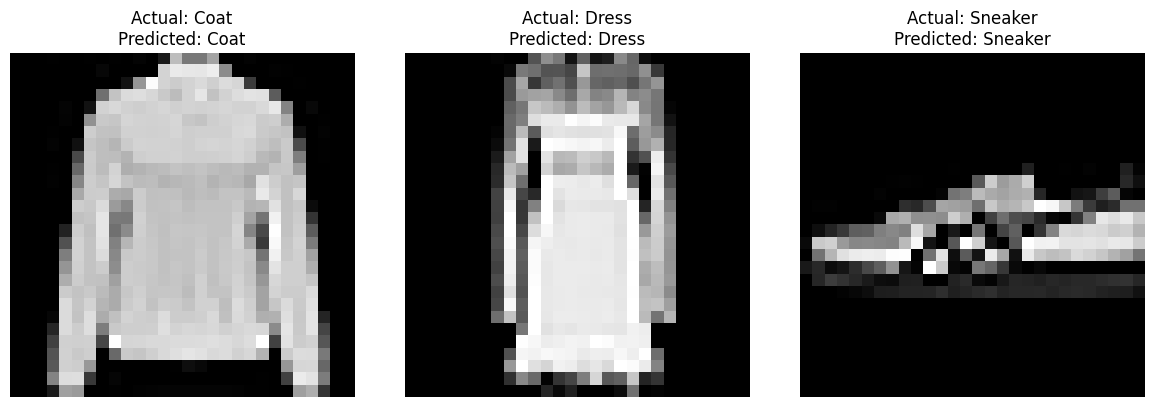

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [=====

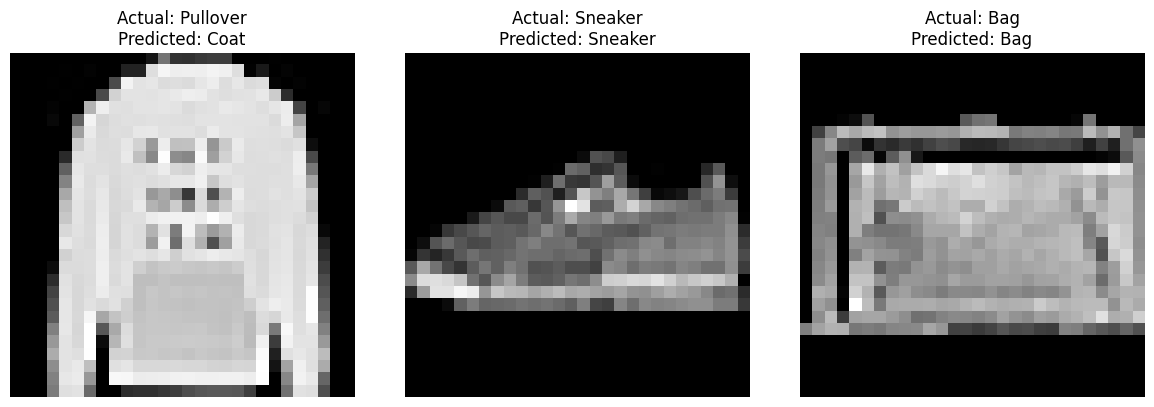

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_19 (Dense)            (None, 128)              

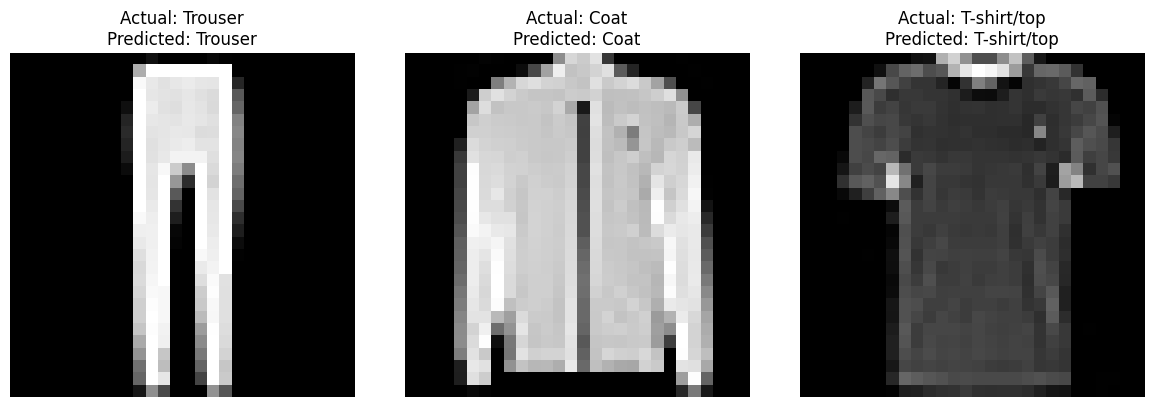

In [28]:

def show_summary(test_data, test_labels, *models):
  '''
  looping through all models to compare the accuracy between them.
  For each model, the function prints the summary of its architecture and calls the polt function on its predictions.
  '''

  for model in models:
    model.summary()
    predict_probs = model.predict(test_data)
    predict_labels = np.argmax(predict_probs, axis=-1)  # choose label with highest probability
    plot(test_data, test_labels, predict_labels)

show_summary(X_test , Y_test , model3, model4 , model5 , model6 , model7 , model8)

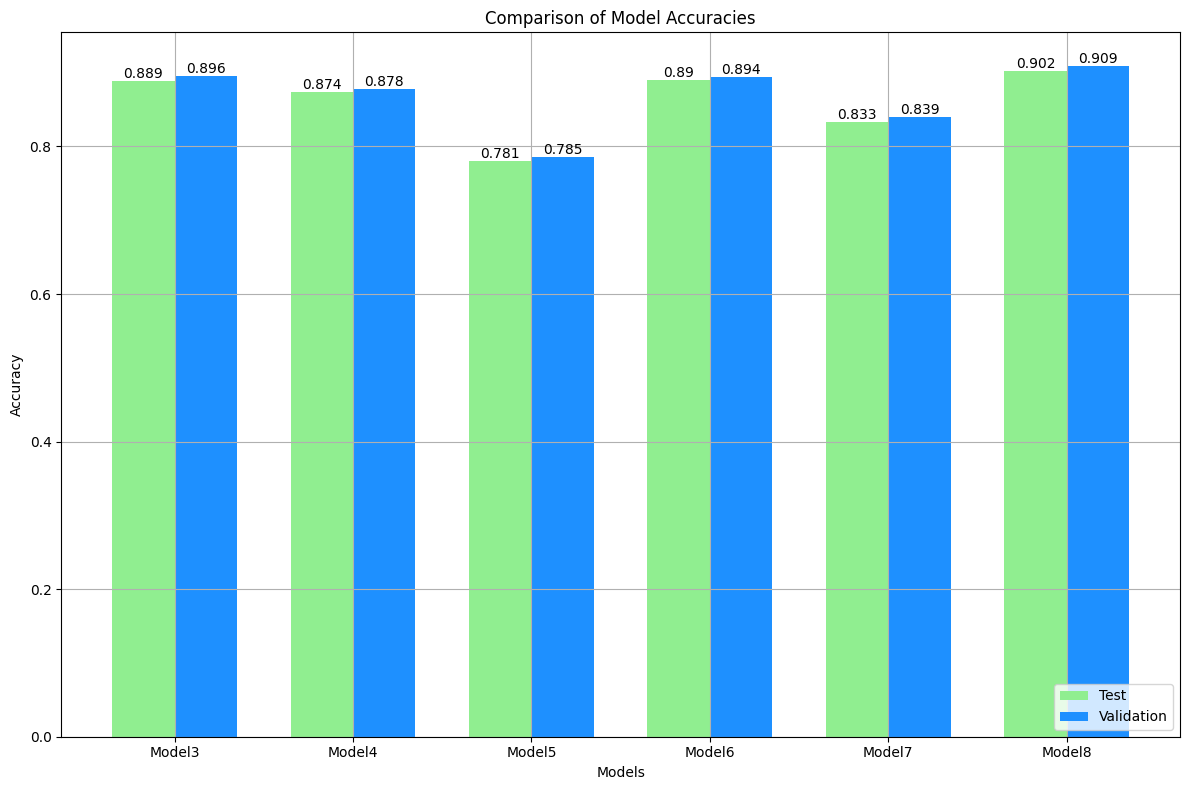

In [31]:

test_accuracies = {
    'Model3': 0.8888,
    'Model4': 0.8744,
    'Model5': 0.7807,
    'Model6': 0.8895,
    'Model7' : 0.8327 ,
    'Model8' : 0.9024
}
validation_accuracies = {
    'Model3': 0.8958,
    'Model4': 0.8777,
    'Model5': 0.7852,
    'Model6': 0.8940,
    'Model7' : 0.8393 ,
    'Model8' : 0.9092
}


# Define labels, bar heights and positions
labels = list(test_accuracies.keys())
test_acc_values = list(test_accuracies.values())
validation_acc_values = list(validation_accuracies.values())

x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, test_acc_values, width, label='Test', color='lightgreen')
rects2 = ax.bar(x + width/2, validation_acc_values, width, label='Validation', color='dodgerblue')


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')  # Move legend to lower right


ax.grid(True)

# Function to add data labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, round(height, 3),
                ha='center', va='bottom')

# Call function to add data labels
add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()
